# Vaje 4: Posebnosti binarne klasifikacije in odločitvena drevesa

## Naloga 1: Mere kakovosti

In [1]:
import numpy as np

data = np.load("../Podatki/vaje4_1.npy")
X = data[:, :-1]
y =data[:, -1].astype(bool)

1.a: Najdi najboljšo vrednost parametra k za napovedni model k najbližjih sosedov v primeru, ko za mero kakovosti izberemo natančnost (precision), priklic, ali ploščino pod ROC krivuljo (AUC ROC). Za oceno napake uporabi 5 kratno prečno preverjanje.

<details>
  <summary>Namig:</summary>

  *Pomagaj si s [funkcijami sklearn.metrics.precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [sklearn.metrics.recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html).
   
</details>

In [2]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import matplotlib.pyplot as plt 

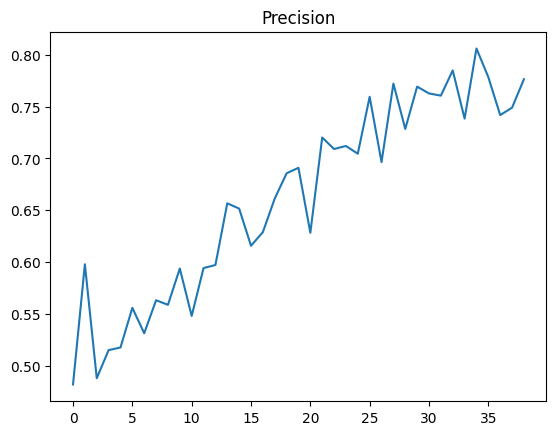

Best k for precision 35 with score 0.8061428045638571


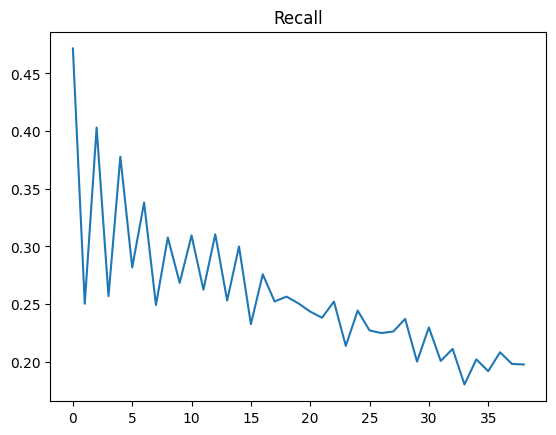

Best k for recall 1 with score 0.4715594906639683


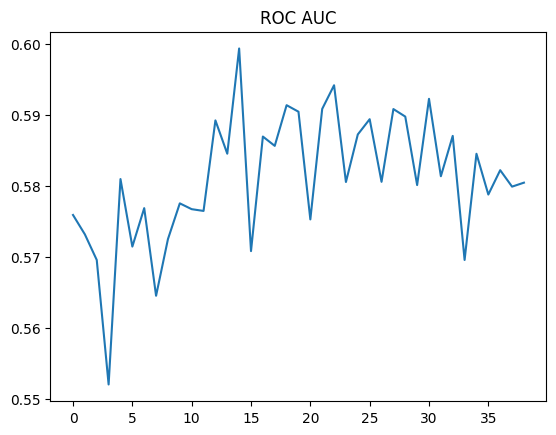

Best k for roc-auc 15 with score 0.5993993366735157


In [4]:
np.random.seed(42)

kfold = KFold(n_splits=5, shuffle=True)
precision = []
recall = []
roc_auc = []

for n_neighbours in range(1, 40):
    folds_precision = []
    folds_recall = []
    folds_auc = []
    
    for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
        x_train = X[train_idx]
        x_test = X[test_idx]
        y_train = y[train_idx]
        y_test = y[test_idx]
        model = KNeighborsClassifier(n_neighbors=n_neighbours).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Izračunamo vsako od metrik in jih dodamo v seznam z rezultati
        folds_precision.append(precision_score(y_test, y_pred))
        folds_recall.append(recall_score(y_test, y_pred))
        folds_auc.append(roc_auc_score(y_test, y_pred))
    precision.append(np.mean(folds_precision))
    recall.append(np.mean(folds_recall))
    roc_auc.append(np.mean(folds_auc))

plt.plot(precision)
plt.title("Precision")
plt.show()
print(f"Best k for precision {np.argmax(precision)+1} with score {np.max(precision)}")

plt.plot(recall)
plt.title("Recall")
plt.show()
print(f"Best k for recall {np.argmax(recall)+1} with score {np.max(recall)}")

plt.plot(roc_auc)
plt.title("ROC AUC")
plt.show()    
print(f"Best k for roc-auc {np.argmax(roc_auc)+1} with score {np.max(roc_auc)}")

1.b: Najdi najboljšo vrednost parametra k v primeru, ko za mero kakovosti izberemo najmanjšo ceno modela, kjer predpostavljamo, da je napaka tipa 1 dvakrat dražja od napake tipa 2. Napako tipa 1 (zmotno pozitivni)  merite kot delež tistih negativnih primerov, ki so bili zmotno razglašeni za pozitivne. Analogno definirajte napako tipa 2 (zmotno negativni). Končna napaka naj bo torej vsota 2 N1 + N2. Postopate lahko podobno kot zgoraj pri natančnosti. Pomagaš si lahko s funkcijama `numpy.logical_not` in `numpy.logical_and`.

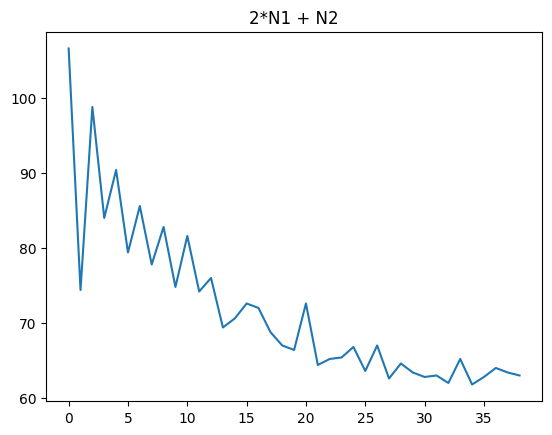

Best k for 2*N1+N2 35 with score 61.8


In [6]:
np.random.seed(42)

kfold = KFold(n_splits=5, shuffle=True)
scores = []

for n_neighbours in range(1, 40):
    fold_scores = []
    for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
        x_train = X[train_idx]
        x_test = X[test_idx]
        y_train = y[train_idx]
        y_test = y[test_idx]
        model = KNeighborsClassifier(n_neighbors=n_neighbours).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Izračunamo napako tipa 1 (Napoved je True, Ciljna vrednost False)
        # logična operacija !y_test & y_pred nam da vrstice s tem primerom 
        t1_error = np.sum(np.logical_and(np.logical_not(y_test), y_pred))
        # Izračunamo napako tipa 2 (Napoved je False, Ciljna vrednost True)
        t2_error = np.sum(np.logical_and(np.logical_not(y_pred), y_test))
        fold_scores.append(2*t1_error + t2_error)
    scores.append(np.mean(fold_scores))
    

plt.plot(scores)
plt.title("2*N1 + N2")
plt.show()    
print(f"Best k for 2*N1+N2 {np.argmin(scores)+1} with score {np.min(scores)}")

1.c: Pri katerih nalogah v resničnem življenju se splača bolj utežiti N1 in pri katerih N2? Kaj je bolj važno za npr. teste, ki zaznavajo okužbe?

N1: Zaradi zmotno pozitivne napake na detektorju laži lahko nedolžen človek gre v zapor

N2: Zaradi zmotno negativne napake lahko zdravnik pri pacientu ne zazna bolezen

## Naloga 2: ROC

2.a: Nariši ROC krivuljo za naslednje podatke

| Napoved  | Ciljna spremenljivka |
| -------- | ----------- |
| 0.9      | T       |
| 0.7      | F       |
| 0.7      | T       |
| 0.5      | F       |
| 0.3      | T       |
| 0.2      | T       |
| 0.2      | F       |
| 0.1      | F       |


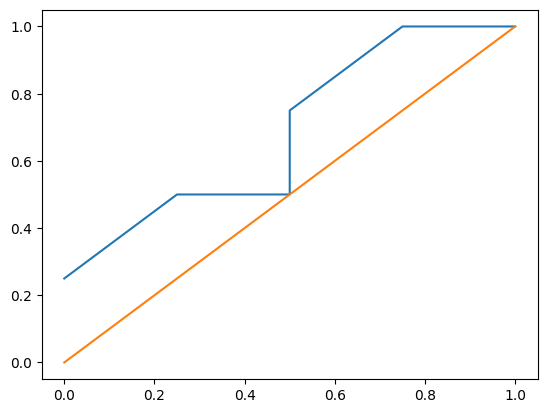

In [9]:
TPR = [0.25, 0.5, 0.5, 0.75, 1, 1]
NPR = [0, 0.25, 0.5, 0.5, 0.75, 1]
plt.plot(NPR, TPR)
plt.plot([0, 1], [0, 1])
plt.show()

2.b: Koliko je točnost modela iz 2.a glede na metriko ROC-AUC.

Površina pod diagonalo: 1/2

6 Pravokotnih trikotnikov s katetama dolžine 1/4: 3/16

Skupaj: 11/16

## Naloga 3: Odločitvena drevesa

3.a: Sestavi podatkovno množico, ki bo "šla na roko" odločitvenim drevesom. Pomagaj si s funkcijami `numpy.random.randint` in logičnimi operatorji `numpy.logical_not`, ...

In [10]:
# Definiramo matriko v katero bomo shranili spremenljivke, z argumentom dtype lahko določimo podatkovni tip elementov matrike
X = np.zeros((1000, 5), dtype=int)
# Naključno vzorčimo podatke za x1, katere zaloga vrednosti je {0,1,2}  
X[:, 0] = np.random.randint(3, size=(1000,))
X[:, 1] = np.random.randint(2, size=(1000,))
X[:, 2] = np.random.randint(2, size=(1000,))
X[:, 3] = np.random.randint(3, size=(1000,))
X[:, 4] = np.random.randint(2, size=(1000,))

y = np.zeros(1000, dtype=bool)
# Vrsticam z x1=0 & x2=1 določimo ciljno vrednost True
y[np.logical_and(X[:, 0]==0, X[:, 1]==1)] = True
# Vrsticam z x1=0 & x4=2 & x5=0 določimo ciljno vrednost True
y[np.logical_and(np.logical_and(X[:, 0]==0, X[:, 3]==2), X[:, 4]==0)] = True
# Vrsticam z x1=1 & x2=0 & x5=1 določimo ciljno vrednost True
y[np.logical_and(np.logical_and(X[:, 0]==1, X[:, 1]==0), X[:, 4]==1)] = True

3.b: Preveri točnost odločitvenih dreves na podatkovni množici iz naloge 3.a. Za vsak vzorec prečnega preverjanja izriši tabela napačnih klasifikacij (confusion matrix).

<details>
  <summary>Namig:</summary>

  *Pomagaj si z [objektom sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) in [objektom sklearn.tree.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)*.
   
</details>

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


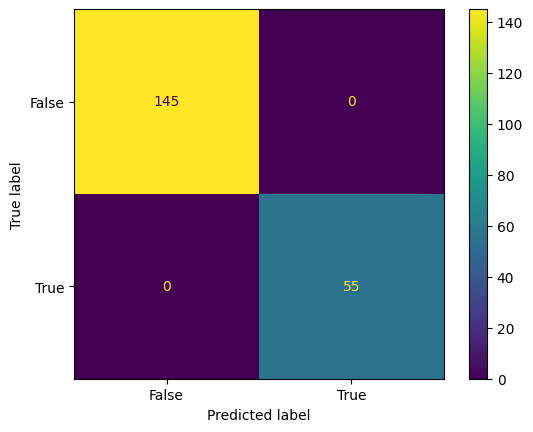

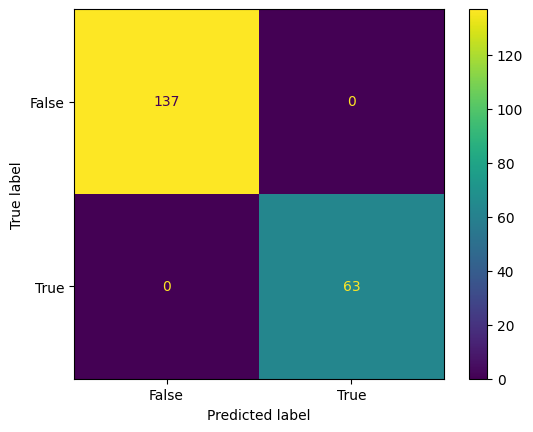

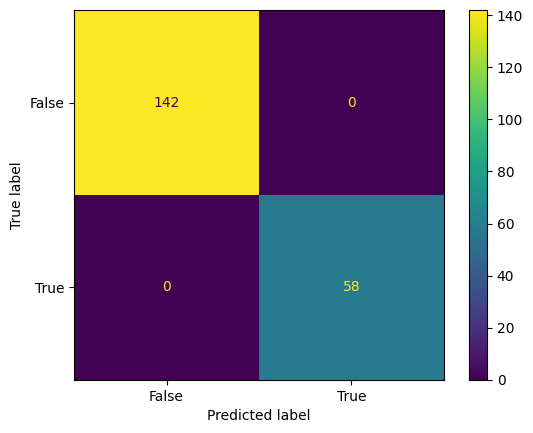

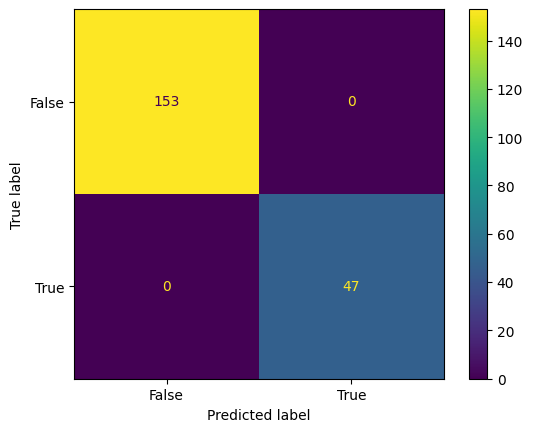

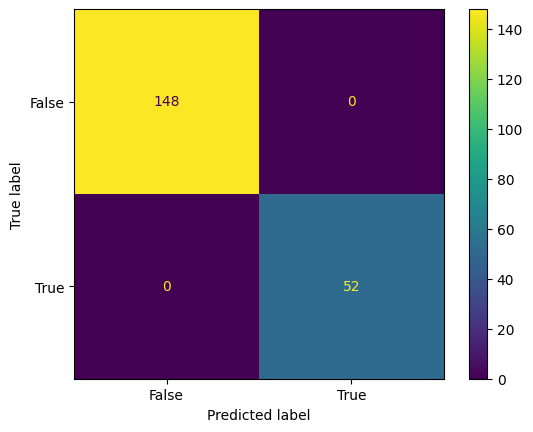

In [12]:
np.random.seed(42)
kfold = KFold(n_splits=5, shuffle=True)
scores = []


for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    x_train = X[train_idx]
    x_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    model = DecisionTreeClassifier().fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # Tabelo napačnih klasifikacij izrišemo z klicem funkcije ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)



Vidimo, da naš model doseže 100% točnost

3.c: Natreniraj model odločitvenih dreves na vseh podatkih in drevo vizualiziraj. Lahko v nastalem drevesu najdete vsa pravila iz naloge 3.a?

<details>
  <summary>Namig:</summary>

  *Pomagaj si z [objektom sklearn.tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)*.
   
</details>

In [13]:
from sklearn.tree import plot_tree

[Text(0.5555555555555556, 0.9, 'x[0] <= 0.5\ngini = 0.399\nsamples = 1000\nvalue = [725, 275]'),
 Text(0.3333333333333333, 0.7, 'x[1] <= 0.5\ngini = 0.493\nsamples = 338\nvalue = [149, 189]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.5\ngini = 0.239\nsamples = 173\nvalue = [149.0, 24.0]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(0.3333333333333333, 0.3, 'x[4] <= 0.5\ngini = 0.5\nsamples = 49\nvalue = [25, 24]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.0\nsamples = 165\nvalue = [0, 165]'),
 Text(0.7777777777777778, 0.7, 'x[0] <= 1.5\ngini = 0.226\nsamples = 662\nvalue = [576, 86]'),
 Text(0.6666666666666666, 0.5, 'x[4] <= 0.5\ngini = 0.394\nsamples = 319\nvalue = [233, 86]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 166\nvalue = [166, 0]'),
 Text(0.7777777777777778, 0.3, 'x[1]

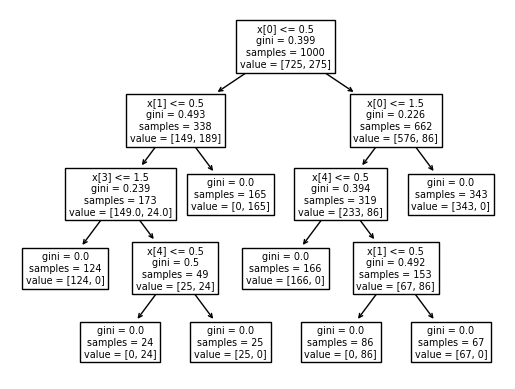

In [14]:
model = DecisionTreeClassifier().fit(X, y)
# Z metodo plot_tree izrišemo drevo
plot_tree(model)

3.d: Naključno izberi 5 vrstic iz podatkovne množice in jim spremeni ciljno vrednost. Natreniraj model odločitvenih dreves z višino največ 4 in ga ponovno vizualiziraj. Vidiš kakšno razliko v listih drevesa?

[Text(0.6125, 0.9, 'x[0] <= 0.5\ngini = 0.4\nsamples = 1000\nvalue = [724, 276]'),
 Text(0.375, 0.7, 'x[1] <= 0.5\ngini = 0.494\nsamples = 338\nvalue = [150.0, 188.0]'),
 Text(0.2, 0.5, 'x[3] <= 1.5\ngini = 0.247\nsamples = 173\nvalue = [148.0, 25.0]'),
 Text(0.1, 0.3, 'x[3] <= 0.5\ngini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.05, 0.1, 'gini = 0.036\nsamples = 54\nvalue = [53, 1]'),
 Text(0.15, 0.1, 'gini = 0.0\nsamples = 70\nvalue = [70, 0]'),
 Text(0.3, 0.3, 'x[4] <= 0.5\ngini = 0.5\nsamples = 49\nvalue = [25, 24]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.35, 0.1, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.55, 0.5, 'x[3] <= 0.5\ngini = 0.024\nsamples = 165\nvalue = [2, 163]'),
 Text(0.5, 0.3, 'x[4] <= 0.5\ngini = 0.058\nsamples = 67\nvalue = [2, 65]'),
 Text(0.45, 0.1, 'gini = 0.054\nsamples = 36\nvalue = [1, 35]'),
 Text(0.55, 0.1, 'gini = 0.062\nsamples = 31\nvalue = [1, 30]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 98\nvalue =

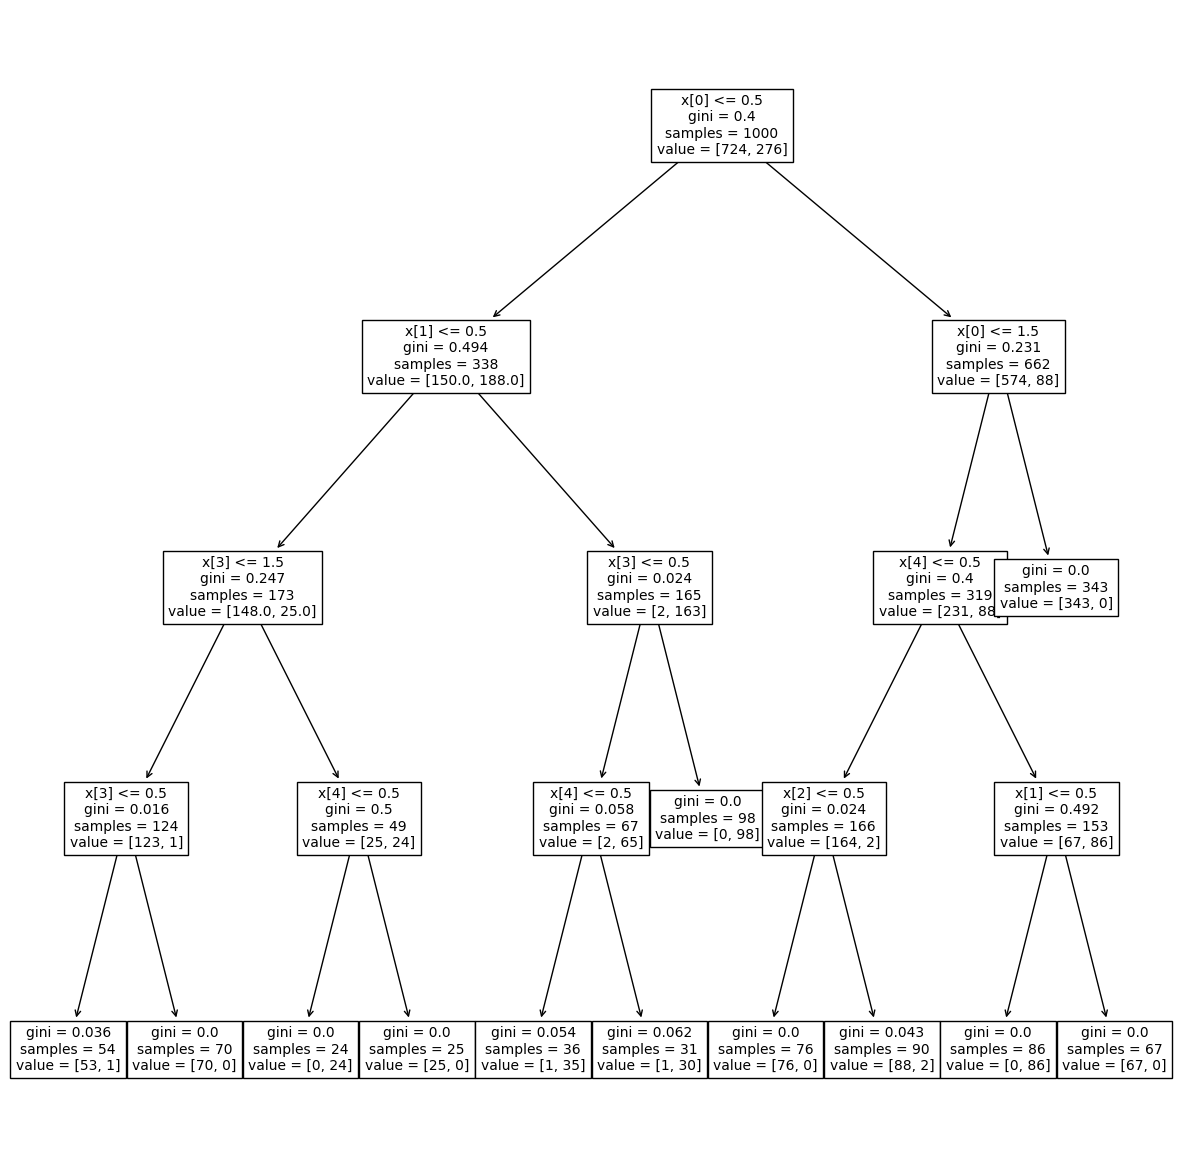

In [15]:
# Kopiramo ciljne vrednosti
y_new = y.copy()
# Permutiramo matriko indeksov in izberemo prvih 5
# Na ta način poskrbimo, da večkrat ne izberemo isto vrstico
selected_indices = np.random.permutation(y.shape[0])[:5]
# Vrsticam izbranih indeksov negiramo ciljno vrednost
y_new[selected_indices] = np.logical_not(y_new[selected_indices])

# Z parametrom max_depth omejimo največjo globino drevesa
model = DecisionTreeClassifier(max_depth=4).fit(X, y_new)
# Povečamo izrisano sliko
plt.figure(figsize=(15,15))
# S parametrom fontsize povečamo font na sliki
plot_tree(model, fontsize=10)

Vidimo, da se je model/drevo drastično spremenilo in da imamo sedaj liste, v katerih niso le predstavniki ene ciljne vrednosti.